In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF

from sklearn.datasets import make_blobs, make_circles
from sklearn.datasets import load_iris, load_breast_cancer, load_digits

from sklearn.linear_model import SGDClassifier, LogisticRegression, Ridge, Lasso
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [6]:
from sklearn.model_selection import GridSearchCV

In [36]:
cancer = load_breast_cancer()
X, y = (cancer.data, cancer.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
pca = PCA(5).fit(X_train)
X_trainc = pca.transform(X_train)
X_testc = pca.transform(X_test)

In [37]:
SVC().fit(X_trainc, y_train).score(X_testc, y_test)

0.958041958041958

0.972027972027972
0.01 1000.0


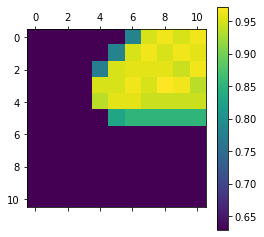

In [51]:
C_params = 10 ** np.linspace(-5, 5, 11)
gamma_params = 10 ** np.linspace(-5, 5, 11)
scores = []

maxv = 0
for i, gamma in enumerate(gamma_params):
    scores.append([])
    for j, C in enumerate(C_params):
        svc = SVC(gamma = gamma, C = C).fit(X_trainc, y_train)
        score = svc.score(X_testc, y_test)
        scores[-1].append(score)
        if score > maxv:
            maxv = score
            best_params = (i, j)
        
print(maxv)
print(gamma_params[best_params[0]], C_params[best_params[1]])
img = plt.matshow(scores)
plt.colorbar(img)
plt.show()

In [53]:
grs = GridSearchCV(SVC(), param_grid = {'gamma': gamma_params, 'C': C_params}).fit(X_trainc, y_train)

In [57]:
print(grs.best_params_)
print(grs.best_score_)
print(grs.score(X_testc, y_test))

{'C': 100.0, 'gamma': 0.0001}
0.9765253077975377
0.965034965034965


In [97]:
from sklearn.pipeline import Pipeline

In [107]:
pipe = Pipeline(steps = [('pca', PCA()), ('scaler', StandardScaler()), ('svm', SVC())])

In [108]:
X, y = (cancer.data, cancer.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [109]:
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.9859154929577465
0.9300699300699301


In [131]:
C_params = 10 ** np.linspace(0, 5, 6)
gamma_params = 10 ** np.linspace(-5, 0, 6)
n_components_params =[5]
param_grid = {'pca__n_components': n_components_params, 'svm__gamma': gamma_params, 'svm__C': C_params}

grs = GridSearchCV(pipe, param_grid = param_grid, cv = 5).fit(X_train, y_train)

In [132]:
print(grs.best_params_)
print(grs.best_score_)
print(grs.score(X_test, y_test))

{'pca__n_components': 5, 'svm__C': 10.0, 'svm__gamma': 0.1}
0.9670861833105334
0.951048951048951


In [134]:
import mglearn

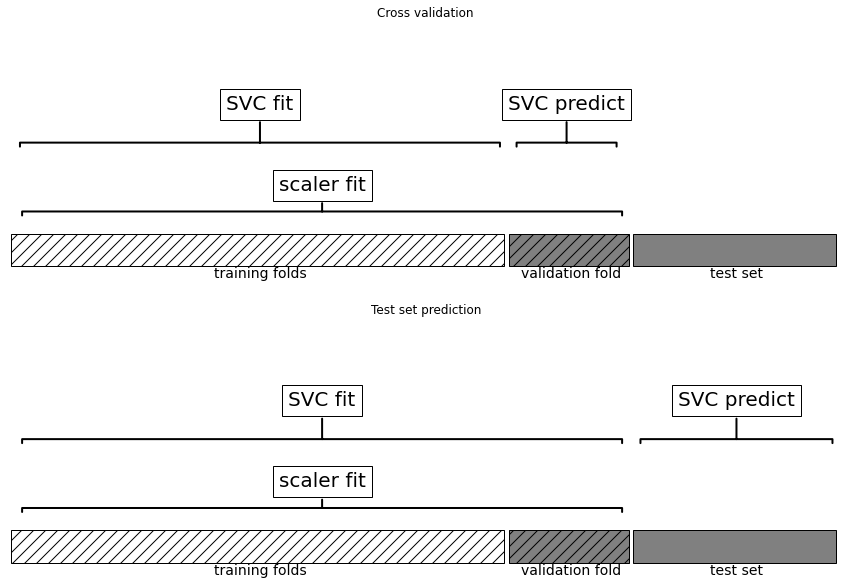

In [135]:
mglearn.plots.plot_improper_processing()

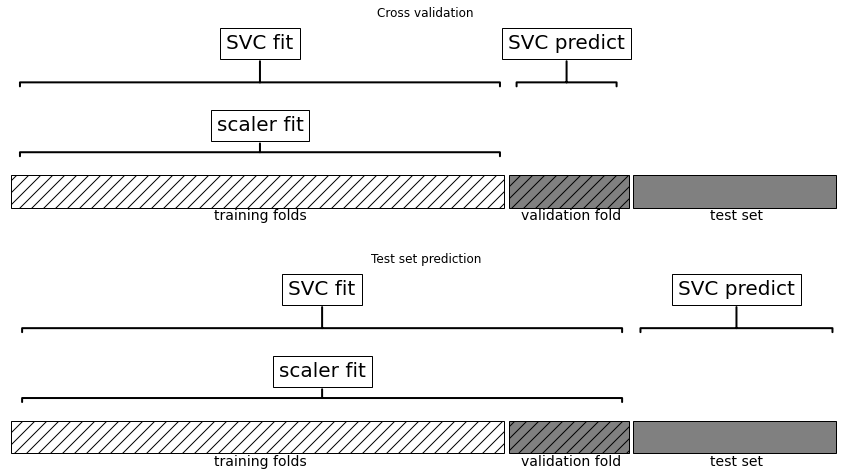

In [136]:
mglearn.plots.plot_proper_processing()

In [164]:
Xn = np.random.normal(size = (10, 100))
yn = np.random.normal(size = (10,))
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, random_state = 0)
print(SVR().fit(Xn_train, yn_train).score(Xn_train, yn_train))
print(SVR().fit(Xn_train, yn_train).score(Xn_test, yn_test))

0.7624076149195544
-6.6407414122673485


In [171]:
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, SelectPercentile

In [172]:
pipen = Pipeline(steps = [('scaler', StandardScaler()), 
                          ('feature_selection', SelectPercentile()), 
                          ('svm', SVC())])

param_grid = {}

grsn = GridSearchCV(pipen, param_grid = param_grid, cv = 5).fit(Xn_train, yn_train)

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "/Users/hadierturk/opt/anac

ValueError: Unknown label type: 'continuous'

In [173]:
print(pipe.steps)

[('pca', PCA()), ('scaler', StandardScaler()), ('svm', SVC())]


In [174]:
from sklearn.pipeline import make_pipeline
# standard syntax
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
# abbreviated syntax
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [175]:
print(pipe_long.steps)
print(pipe_short.steps)

[('scaler', MinMaxScaler()), ('svm', SVC(C=100))]
[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [176]:
print(pipe_long.steps[0][1])
print(pipe_short.named_steps['svc'])

MinMaxScaler()
SVC(C=100)


In [177]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = (boston.data, boston.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [180]:
from sklearn.preprocessing import PolynomialFeatures

reg = Ridge()
ss = StandardScaler()
pol = PolynomialFeatures()
pipe = Pipeline(steps = [('ss', ss), ('pol', pol), ('reg', reg)])

In [181]:
param_grid = {'pol__degree': [1, 2, 3], 'reg__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grs = GridSearchCV(pipe, param_grid = param_grid).fit(X_train, y_train)

In [183]:
print(grs.best_params_)
print(grs.best_score_)
print(grs.score(X_test, y_test))

{'pol__degree': 2, 'reg__alpha': 10}
0.828726140769473
0.7683045464100127


In [194]:
display(pd.DataFrame(grs.cv_results_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pol__degree,param_reg__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003253,0.003550,0.000608,0.000149,1,0.001,"{'pol__degree': 1, 'reg__alpha': 0.001}",0.762602,0.569560,0.779352,0.707744,0.790320,0.721916,0.081298,12
1,0.001625,0.000318,0.000604,0.000078,1,0.01,"{'pol__degree': 1, 'reg__alpha': 0.01}",0.762617,0.569557,0.779353,0.707737,0.790333,0.721919,0.081303,11
2,0.001922,0.000598,0.000815,0.000357,1,0.1,"{'pol__degree': 1, 'reg__alpha': 0.1}",0.762760,0.569525,0.779360,0.707666,0.790459,0.721954,0.081354,10
3,0.001413,0.000569,0.000482,0.000039,1,1,"{'pol__degree': 1, 'reg__alpha': 1}",0.764140,0.569216,0.779410,0.706957,0.791605,0.722266,0.081836,9
4,0.001086,0.000060,0.000459,0.000051,1,10,"{'pol__degree': 1, 'reg__alpha': 10}",0.773967,0.567556,0.778461,0.700054,0.796592,0.723326,0.084591,8
5,0.001070,0.000108,0.000438,0.000040,1,100,"{'pol__degree': 1, 'reg__alpha': 100}",0.781747,0.593544,0.744269,0.654180,0.766017,0.707952,0.072273,13
6,0.001031,0.000058,0.000424,0.000017,1,1000,"{'pol__degree': 1, 'reg__alpha': 1000}",0.572826,0.534902,0.495164,0.430710,0.527080,0.512136,0.047630,17
7,0.002424,0.001436,0.000605,0.000050,2,0.001,"{'pol__degree': 2, 'reg__alpha': 0.001}",0.813194,0.639721,0.631639,0.814685,0.901616,0.760171,0.106601,5
8,0.001664,0.000148,0.000581,0.000043,2,0.01,"{'pol__degree': 2, 'reg__alpha': 0.01}",0.816558,0.635223,0.628425,0.816252,0.900785,0.759448,0.108686,6
9,0.001417,0.000016,0.000539,0.000014,2,0.1,"{'pol__degree': 2, 'reg__alpha': 0.1}",0.817204,0.641411,0.627082,0.830967,0.916594,0.766651,0.113437,4


In [190]:
print(grs.cv_results_['mean_test_score'].shape)

(21,)


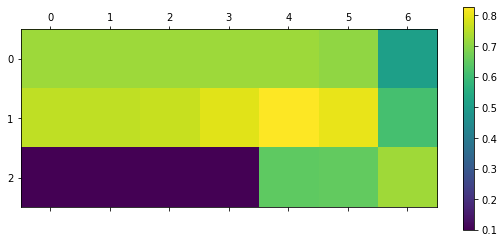

{'pol__degree': 2, 'reg__alpha': 10}
0.828726140769473
0.7683045464100127


In [207]:
plt.matshow(np.maximum(grs.cv_results_['mean_test_score'], 0).reshape(3, 7), vmin = 0.1)
plt.colorbar()
plt.show()
print(grs.best_params_)
print(grs.best_score_)
print(grs.score(X_test, y_test))

In [211]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X, y = (cancer.data, cancer.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [212]:
pipe = Pipeline(steps = [('sca', StandardScaler()), ('pca', PCA(5)), ('clf', SVC())])

In [215]:
param_grid = [{'clf': [SVC()],
             'clf__C': 10**np.linspace(-5,5,11),
             'clf__gamma': 10**np.linspace(-5,5,11)},
             {'clf': [RandomForestClassifier()],
             'clf__n_estimators': np.arange(1,100,10),
             'clf__max_depth': np.arange(3, 7, 2)}]

grs = GridSearchCV(pipe, param_grid = param_grid).fit(X_train, y_train)

In [216]:
print(grs.cv_results_['mean_test_score'].shape)

(141,)


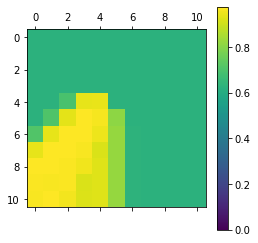

{'clf': SVC(C=100.0, gamma=0.001), 'clf__C': 100.0, 'clf__gamma': 0.001}
0.9765253077975377
0.958041958041958


In [218]:
plt.matshow(grs.cv_results_['mean_test_score'][:121].reshape(11, 11), vmin = 0.0)
plt.colorbar()
plt.show()
print(grs.best_params_)
print(grs.best_score_)
print(grs.score(X_test, y_test))

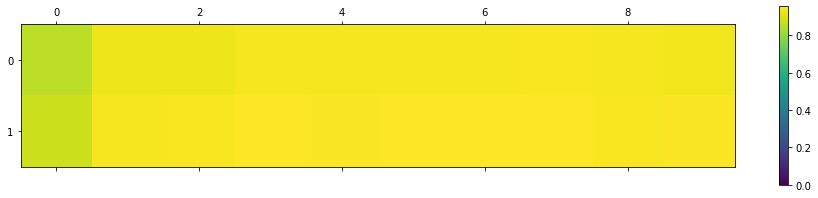

{'clf': SVC(C=100.0, gamma=0.001), 'clf__C': 100.0, 'clf__gamma': 0.001}
0.9765253077975377
0.958041958041958


In [220]:
plt.matshow(grs.cv_results_['mean_test_score'][121:].reshape(2, 10), vmin = 0.0)
plt.colorbar()
plt.show()
print(grs.best_params_)
print(grs.best_score_)
print(grs.score(X_test, y_test))